＃ゼロから始めるディープラーニング
##　第4章　ニューラルネットワークの学習

In [1]:
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
img_show(img)

5
(784,)
(28, 28)


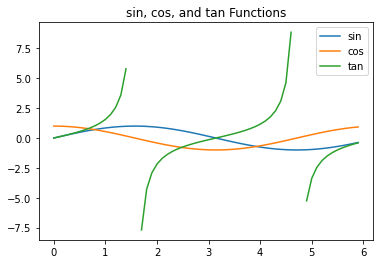

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# x軸の値を生成
x = np.arange(0, 6, 0.1)

# y軸の値を生成
y = np.sin(x)
y2 = np.cos(x)

# tan関数の発散を処理
y3 = np.tan(x)
y3[np.abs(y3) > 10] = np.nan  # 発散する部分をNaNにする

# 各曲線をプロット
plt.plot(x, y, label="sin")  # sin曲線
plt.plot(x, y2, label="cos")  # cos曲線
plt.plot(x, y3, label="tan")  # tan曲線

# グラフのタイトルと凡例を追加
plt.title("sin, cos, and tan Functions")
plt.legend()

# グラフを表示
plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1,2,3],[4,5,6]])
print(A)
np.ndim(A)
A.shape

B = np.array([[1,2],[3,4],[5,6]])
print(B)
B.shape

np.dot(A,B)

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


array([[22, 28],
       [49, 64]])

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],
               [0.2,0.4,0.6]])
b1 = np.array([0.1,0.2,0.3])
A1 = np.dot(x,W1) + b1
print(A1)
#sigmoid関数の定義
def sigmoid(x):
  return 1/(1+np.exp(-x))

Z1 = sigmoid(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


(60000, 784)


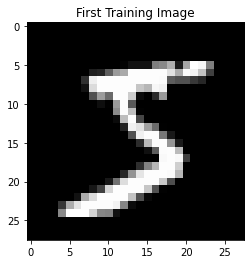

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
#sysはモジュールを読み込むためのパスを検索する。そしてその後os.pardirで親ディレクトリを取得する。その親ディレクトリの中のdatastetのmnistを読み込む。そしてそのmnist.pyを読み込んで、load_mnistというモジュールを読み込む。

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
# 最初の画像データを取得
image = x_train[0].reshape(28, 28)  # 784次元のベクトルを28×28の形に変換

# 可視化
plt.imshow(image, cmap='gray')  # グレースケールで表示
plt.title("First Training Image")
plt.show()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from PIL import Image

#NumPy配列形式の画像データをPillowのImageオブジェクトに変換し、画像を表示する。
def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

(x_train,t_train),(x_test,t_test) = load_mnist(flatten=True,normalize=False)
img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28,28)
print(img.shape)
img_show(img)

5
(784,)
(28, 28)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import pickle

#sigmoid関数の定義
def sigmoid(x):
    return 1/(1+np.exp(-x))
#SoftMax関数の定義
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test
def init_network():
    with open("sample_weight.pkl","rb") as f:
        network = pickle.load(f)
    return network

def predict(network,x):
    W1,W2,W3 = network["W1"],network["W2"],network["W3"]
    b1,b2,b3 = network["b1"],network["b2"],network["b3"]
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = softmax(a3)

    return y

x,t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
print("accuracy:"+str(float(accuracy_cnt)/len(x)))

accuracy:0.9352


# 第4章 ニューラルネットワークの学習

In [4]:
#二条和誤差
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def mean_squared_error(y,t):
  return 0.5*np.sum((y-t)**2)

mean_squared_error(np.array(y),np.array(t))

def cross_entropy_error(y,t):
  delta = 1e-7
  return -np.sum(t*np.log(y+delta))

cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
np.random.choice(60000, batch_size)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size


(60000, 784)
(60000, 10)


### 数値微分の例

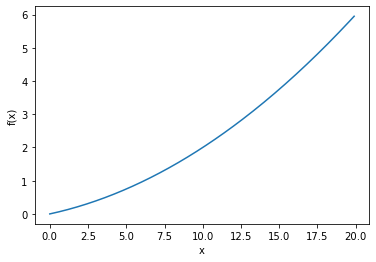

0.2999999999986347

In [20]:
import numpy as np
import matplotlib.pylab as plt
def numerical_diff(f,x):
  h = 1e-4
  return(f(x+h)-f(x-h))/(2*h)

def function_1(x):
  return 0.01*x**2+0.1*x
x = np.arange(0,20,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

numerical_diff(function_1,5)
numerical_diff(function_1,10)

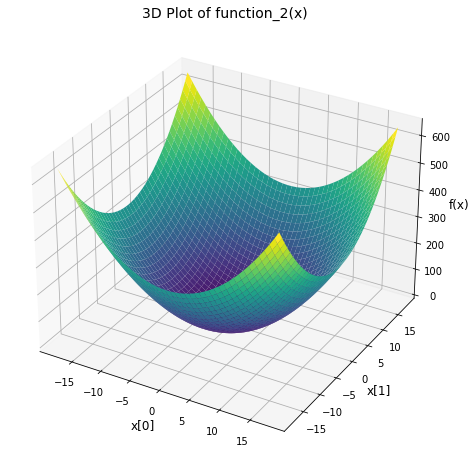

In [24]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 関数の定義
def function_2(x):
    return x[0]**2 + x[1]**2

# x[0] と x[1] を作成
x0 = np.arange(-18, 18, 0.1)  # -18から18まで0.1刻みの値を生成
x1 = np.arange(-18, 18, 0.1)

# メッシュグリッドを作成
X0, X1 = np.meshgrid(x0, x1)  # グリッド状の配列を作成
Z = function_2([X0, X1])      # 各グリッド点で関数の値を計算

# プロットの設定
fig = plt.figure(figsize=(10, 8))  # プロット領域を作成
ax = fig.add_subplot(111, projection='3d')  # 3Dプロットを設定

# 3Dサーフェスを描画
ax.plot_surface(X0, X1, Z, cmap='viridis', edgecolor='none')

# グラフのラベル設定
ax.set_title("3D Plot of function_2(x)", fontsize=14)
ax.set_xlabel("x[0]", fontsize=12)
ax.set_ylabel("x[1]", fontsize=12)
ax.set_zlabel("f(x)", fontsize=12)

# グラフを表示
plt.show()

In [44]:
import numpy as np

def partial_derivative(f, var_idx, point):
    """
    偏微分を数値的に計算する関数

    Args:
        f: 偏微分する関数
        var_idx: 偏微分する変数のインデックス（0: x, 1: y, ...）
        point: 偏微分する点 (リストまたはタプル)

    Returns:
        偏微分の結果
    """
    h = 1e-5  # 微小変化量
    point_forward = np.array(point, dtype=float)
    point_backward = np.array(point, dtype=float)

    # 前進点と後退点を設定
    point_forward[var_idx] += h
    point_backward[var_idx] -= h

    # 偏微分を中心差分法で計算
    return (f(point_forward) - f(point_backward)) / (2 * h)

# テスト用の関数
def function(point):
    x, y = point
    return x**2 + y**2

# 偏微分を計算
point = [3, 4]
df_dx = partial_derivative(function, var_idx=0, point=point)  # ∂f/∂x
df_dy = partial_derivative(function, var_idx=1, point=point)  # ∂f/∂y

print(f"∂f/∂x at {point} = {df_dx}")
print(f"∂f/∂y at {point} = {df_dy}")


∂f/∂x at [3, 4] = 6.000000000128124
∂f/∂y at [3, 4] = 7.999999999874773


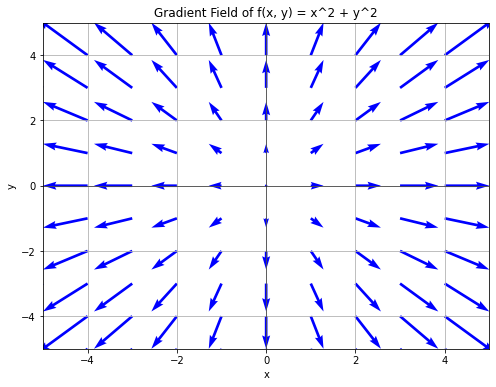

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# 偏微分を数値的に計算する関数
def partial_derivative(f, var_idx, point):
    h = 1e-5  # 微小変化量
    point_forward = np.array(point, dtype=float)
    point_backward = np.array(point, dtype=float)

    # 前進点と後退点を設定
    point_forward[var_idx] += h
    point_backward[var_idx] -= h

    # 偏微分の中心差分法で計算
    return (f(point_forward) - f(point_backward)) / (2 * h)

# 目的の関数
def function_1(point):
    x0, x1 = point
    return x0**2 + x1**2

# 勾配を計算する関数
def gradient(f, point):
    grad = np.zeros(len(point))  # 勾配ベクトルを初期化
    for i in range(len(point)):
        grad[i] = partial_derivative(f, i, point)  # 偏微分を計算
    return grad

# グリッドを作成
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
X, Y = np.meshgrid(x, y)

# 各点での勾配を計算
U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        grad = gradient(function_1, (X[i, j], Y[i, j]))
        U[i, j] = grad[0]  # ∂f/∂x
        V[i, j] = grad[1]  # ∂f/∂y

# グラフを描画
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=7, color="blue")
plt.title("Gradient Field of f(x, y) = x^2 + y^2")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


In [ ]:
#勾配降下法を実装する
import numpy as np
def numerical_gradient(f, x):
    """
    数値微分で勾配を計算する関数
    f: 関数
    x: 点 (np.array)
    """
    h = 1e-4  # 微小変化量
    grad = np.zeros_like(x)  # 勾配を初期化
    for i in range(x.size):
        tmp_val = x[i]

        # 前進点
        x[i] = tmp_val + h
        fxh1 = f(x)

        # 後退点
        x[i] = tmp_val - h
        fxh2 = f(x)

        # 中心差分法
        grad[i] = (fxh1 - fxh2) / (2 * h)

        x[i] = tmp_val  # 元の値に戻す

    return grad


def gradient_decent(f,init_x,lr=0.01,step_num=100):
  """
  f：関数
  init_x：初期値
  lr：学習率
  step_num：勾配を求める回数
  """
  x = init_x
  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x -= lr * grad
    return x

def function_2(x):
  return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])
print(gradient_decent(function_2,init_x=init_x,lr=0.8,step_num=100))

[ 1.8 -2.4]


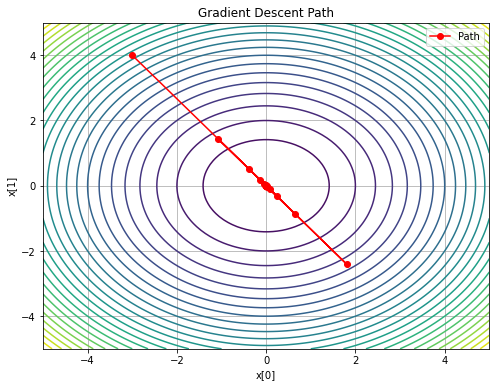

In [58]:
#勾配降下法の過程をグラフで表す
import numpy as np
import matplotlib.pyplot as plt

def numerical_gradient(f, x):
    """
    数値微分で勾配を計算する関数
    f: 関数
    x: 点 (np.array)
    """
    h = 1e-4  # 微小変化量
    grad = np.zeros_like(x)  # 勾配を初期化
    for i in range(x.size):
        tmp_val = x[i]

        # 前進点
        x[i] = tmp_val + h
        fxh1 = f(x)

        # 後退点
        x[i] = tmp_val - h
        fxh2 = f(x)

        # 中心差分法
        grad[i] = (fxh1 - fxh2) / (2 * h)

        x[i] = tmp_val  # 元の値に戻す

    return grad


def gradient_decent(f, init_x, lr=0.1, step_num=100):
    """
    f：関数
    init_x：初期値
    lr：学習率
    step_num：勾配を求める回数
    """
    x = init_x
    trajectory = [x.copy()]  # 点の移動を記録
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        trajectory.append(x.copy())  # 各ステップの点を保存
    return np.array(trajectory)


def function_2(x):
    return x[0]**2 + x[1]**2


# 初期値と学習率
init_x = np.array([-3.0, 4.0])
lr = 0.8
step_num = 100

# 勾配降下法の実行
trajectory = gradient_decent(function_2, init_x=init_x, lr=lr, step_num=step_num)

# グラフ描画
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2  # f(x, y) の値

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=30, cmap='viridis')  # 等高線を描画
plt.plot(trajectory[:, 0], trajectory[:, 1], 'o-', color='red', label="Path")  # 点の移動を描画
plt.title("Gradient Descent Path")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.pardir)  # モジュール検索パスを1つ上のディレクトリに追加
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 重みをランダムに初期化

    def predict(self, x):
        return np.dot(x, self.W)  # 入力と重みの行列積を計算

    def loss(self, x, t):
        z = self.predict(x)  # 入力を予測
        y = softmax(z)  # ソフトマックスで出力を確率に変換
        loss = cross_entropy_error(y, t)  # クロスエントロピー誤差を計算
        return loss

# クラスの外でインスタンスを作成して使用
net = simpleNet()
print("Initial weights:\n", net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
np.argmax(p)
t = np.array([0, 0, 1])
net.loss(x, t)
print("Loss:", net.loss(x, t))

def f(W):
    return net.loss(x,t)
dw = numerical_gradient(f, net.W) #損失関数の勾配を求める
print("Gradient:\n", dw)


Initial weights:
 [[ 0.23889093  0.26819853 -0.64219694]
 [-1.27588089  1.69317131  0.21590052]]
[-1.00495824  1.6847733  -0.19100769]
Loss: 2.0755604641214864
Gradient:
 [[ 0.03336198  0.49134601 -0.524708  ]
 [ 0.05004298  0.73701902 -0.78706199]]


In [ ]:
#二層のニューラルネットワークを実装する
import numpy as np
import sys,os
sys.path.append(os.pardir)
from common.functions import softmax,cross_entropy_error
from common.gradient import numerical_gradient

#TwoLayerNetクラスの定義
class TwoLayer:

  def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
    #重みの初期化
    self.


In [ ]:
#オブジェクト指向の勉強1

class Animal:
    def __init__(self, name, species):
        self.name = name
        self.species = species

    def introduce(self):
        print(f"私は {self.species} の {self.name} です。")
        print(f"selfの正体は: {self}")

    def speak(self):
        if self.species == "犬":
            print("ワンワン！")
        elif self.species == "猫":
            print("ニャーニャー！")
        elif self.species == "鳥":
            print("ピヨピヨ！")
        else:
            print("未知の鳴き声です。")


# インスタンスを作成
animal1 = Animal("ポチ", "犬")
animal2 = Animal("ミケ", "猫")

# 動物の自己紹介
animal1.introduce()
animal2.introduce()


In [ ]:
#オブジェクト指向勉強2
class Person:
    def __init__(self, name, age):
        """
        コンストラクタ
        - name: 名前
        - age: 年齢
        """
        self.name = name  # 名前を保持
        self.age = age    # 年齢を保持

    def introduce(self):
        """
        自己紹介を行うメソッド
        """
        print(f"こんにちは、私の名前は {self.name} です。年齢は {self.age} 歳です。")


class Student(Person):
    def __init__(self, name, age, school_class):
        """
        生徒クラスのコンストラクタ
        - school_class: クラス名
        """
        super().__init__(name, age)  # 親クラス（Person）の初期化
        self.school_class = school_class  # クラス名を保持

    def study(self):
        """
        勉強を行うメソッド
        """
        print(f"{self.name} は {self.school_class} で勉強しています。")


class Teacher(Person):
    def __init__(self, name, age, subject):
        """
        先生クラスのコンストラクタ
        - subject: 担当科目
        """
        super().__init__(name, age)  # 親クラス（Person）の初期化
        self.subject = subject  # 担当科目を保持

    def teach(self):
        """
        授業を行うメソッド
        """
        print(f"{self.name} 先生は {self.subject} を教えています。")


# インスタンスを作成
person1 = Person("かつのぶ", 23)
person2 = Person("きらら", 28)
student1 = Student("たろう", 16, "1組")
student2 = Student("はなこ", 17, "2組")
teacher = Teacher("佐藤", 45, "数学")

# 動作確認
person1.introduce()  # こんにちは、私の名前は かつのぶ です。年齢は 23 歳です。
person2.introduce()  # こんにちは、私の名前は きらら です。年齢は 28 歳です。
student1.study()     # たろう は 1組 で勉強しています。
teacher.teach()      # 佐藤 先生は 数学 を教えています。
